In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
from numpy import linalg

# Problème de Transport 1D

Dans ce problème, nous considérons l'équation de transport 1D suivante :

\begin{equation}
    \frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0 \quad \text{pour} \quad t > 0, \quad x \in [0, 10]
\end{equation}

où $ u(t, x) $ est la fonction inconnue représentant la quantité transportée, $ c $ est la vitesse de transport, et $ u_0(x) $ est la condition initiale définie sur le domaine spatial $ [0, 10] $.

Nous avons également la condition initiale :

\begin{equation}
    u(0, x) = u_0(x) \quad \text{pour} \quad x \in [0, 10]
\end{equation}

L'objectif est de résoudre cette équation pour obtenir $ u(t, x) $ pour tout $ t > 0 $ et $ x \in [0, 10] $.


### Solution Exacte

La solution exacte à tout temps $ t $ est :

$$ u(x, t) = u_0(x-at) = \begin{cases} 
      2 & \text{si } x - at \in [1, 2] \\
      0 & \text{sinon} 
   \end{cases} $$

Cette solution représente une onde se déplaçant à une vitesse $ a $ sans changer de forme, ce qui est caractéristique de l'équation de transport.


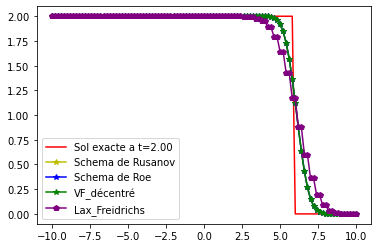

L'erreur pour le schema de Roe: 1.8484878842264776
L'erreur pour le schema Rsnv: 1.8484878842264776
L'erreur pour le schema Lax-Freiderichs: 2.3872216965578597
L'erreur pour le schema volume fini decentré: 1.8484878842264776
L'erreur pour le schema volume fini centré: 58.090948903824206


In [3]:
# La vitesse:
a = 2
# Les extremites:
l = -10
L = 10
# Le temps final:
T=2
# La descitisation du domaine:
N = 101
dx = (L-l)/(N-1)
X = np.linspace(l,L,N)
# CFL:
CFL=1/2
dt=CFL*dx/a


# La solution initiale:
alpha = 5

def u0(x):
    if  x <= 2:
        return 2
    else: return 0

# Le flux Exacte:
def F(u):
    return a*u


def Rusanov(ug,ud):
    return 0.5*(F(ug)+F(ud)-a*(ud-ug))

def Roe(ug,ud):
    if a >= 0:
        return F(ug)
    else:
        return F(ud)
    
def LF(ug,ud):
    return 0.5*(F(ug)+F(ud)-(dx/(dt))*(ud-ug))
       
    
U0=np.array([u0(x) for x in X])




Un_Roe = U0.copy()
Unp1_Roe = np.zeros(N)


Un_FVD = U0.copy()
Unp1_FVD = np.zeros(N)

Un_FVC = U0.copy()
Unp1_FVC = np.zeros(N)

Un_LF = U0.copy()
Unp1_LF = np.zeros(N)

Un_Rsnv = U0.copy()
Unp1_Rsnv = np.zeros(N)



j=0
temps = 0
while temps <= T:
    ############################################################################################
    ###################################### Schema de Roe #######################################
    ############################################################################################
    for i in range(1,N-1):
        Fd=Roe(Un_Roe[i],Un_Roe[i+1])
        Fg=Roe(Un_Roe[i-1],Un_Roe[i])
        Unp1_Roe[i]=Un_Roe[i]-dt/dx*(Fd-Fg)
        
    Unp1_Roe[0] = Unp1_Roe[1]
    Unp1_Roe[N-1] = Unp1_Roe[N-2]
    
    
    Un_Roe = Unp1_Roe.copy()
    
    ############################################################################################
    ################################# Schema centré VF #########################################
    ############################################################################################
    for i in range(2, N-1):
        Fd = 0.5 *( F(Un_FVC[i]) + F(Un_FVC[i+1]))
        Fg = 0.5 *( F(Un_FVC[i-1]) + F(Un_FVC[i]))
        Unp1_FVC[i] = Un_FVC[i] - dt / dx * (Fd - Fg)
    
    Unp1_FVC[0] = Unp1_FVC[1] = Unp1_FVD[2]
    Unp1_FVC[N-1] = Unp1_FVC[N-2]
    
    Un_FVC = Unp1_FVC.copy()
    ############################################################################################
    ############################### Shema De Lax_Friedrichs ####################################
    ############################################################################################
    for i in range(1,N-1):
        Fd=LF(Un_LF[i],Un_LF[i+1])
        Fg=LF(Un_LF[i-1],Un_LF[i])  
        Unp1_LF[i]=Un_LF[i]-dt/dx*(Fd-Fg)
        
    Unp1_LF[0] = Unp1_LF[1]
    Unp1_LF[N-1] = Unp1_LF[N-2]
    
    
    Un_LF = Unp1_LF.copy()
    ############################################################################################
    ################################# Schema decentré VF #######################################
    ############################################################################################
    for i in range(2, N-1):
        Fd = F(Un_FVD[i]) 
        Fg = F(Un_FVD[i-1]) 
        Unp1_FVD[i] = Un_FVD[i] - dt / dx * (Fd - Fg)
    
    Unp1_FVD[0] = Unp1_FVD[1] = Unp1_FVD[2]
    Unp1_FVD[N-1] = Unp1_FVD[N-2]
    
    Un_FVD = Unp1_FVD.copy()
    
    ############################################################################################
    ###################################### Schema de Rusanov ###################################
    ############################################################################################
    for i in range(1,N-1):
        
        Fd = Rusanov(Un_Rsnv[i],Un_Rsnv[i+1])
        Fg = Rusanov(Un_Rsnv[i-1],Un_Rsnv[i])
        Unp1_Rsnv[i]=Un_Rsnv[i]-dt/dx*(Fd-Fg)
        
    Unp1_Rsnv[0] = Unp1_Rsnv[1]
    Unp1_Rsnv[N-1] = Unp1_Rsnv[N-2]
    
    
    Un_Rsnv = Unp1_Rsnv.copy()
    
    ############################################################################################
    #################################### Solution Exacte #######################################
    ############################################################################################
    Uexact = np.zeros(N)
    for i in range(N):
        Uexact[i] = u0(X[i] - a * temps)
       
    temps = temps + dt
    
plt.plot(X, Uexact, '-r', label=f'Sol exacte a t={temps:.2f}')
plt.plot(X, Un_Rsnv, '*-y', label='Schema de Rusanov')
plt.plot(X, Un_Roe, '*-b', label='Schema de Roe')
plt.plot(X, Un_FVD, '*-g', label='VF_décentré')
plt.plot(X, Un_LF, linestyle='-', marker='p', color='purple', label='Lax_Freidrichs')

plt.legend()
plt.pause(0.1)   

e_Roe =  np.linalg.norm(Uexact - Un_Roe,ord = 2) 
e_Rsnv =  np.linalg.norm(Uexact - Un_Rsnv,ord = 2) 
e_LF =  np.linalg.norm(Uexact - Un_LF,ord = 2) 
e_FVD =  np.linalg.norm(Uexact - Un_FVD,ord = 2) 
e_FVC =  np.linalg.norm(Uexact - Un_FVC,ord = 2) 
   
print(f"L'erreur pour le schema de Roe: {e_Roe}")
print(f"L'erreur pour le schema Rsnv: {e_Rsnv}")
print(f"L'erreur pour le schema Lax-Freiderichs: {e_LF}")
print(f"L'erreur pour le schema volume fini decentré: {e_FVD}")
print(f"L'erreur pour le schema volume fini centré: {e_FVC}")


## Burgers Equation:

## Détente :

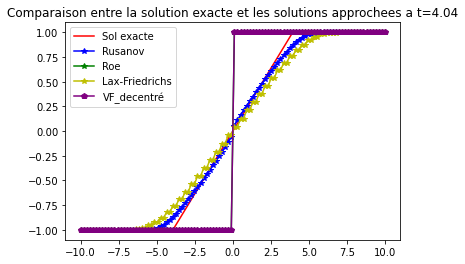

L'erreur pour le schema de Roe: 3.6043658237549927
L'erreur pour le schema Rsnv: 0.4103307774084685
L'erreur pour le schema Lax-Freiderichs: 0.9190098232310573
L'erreur pour le schema volume fini decentré: 3.6043658237549927


In [4]:
N=100
l=-10
L=10
h=(L-l)/(N-1)
T=4
ul=-1
ur=1
dx = (L-l)/(N-1)
X = np.linspace(l,L,N)
# CFL:
CFL=0.5



def u0(x):
    if x<=0:
        return ul
    else:
        return ur

def Uex(t,x):
    if x<= ul*t:
        return ul
    
    elif x>ul*t and x< ur*t:
        return x/t
    
    else: return ur



"*************le flux exacte**************"
def F(u):
    return (u**2)/2


    
"*************le flux de Rusanov**************"
def Rusanov(ug,ud):
    lamda= max(abs(ug),abs(ud))
    return 0.5*(F(ug)+F(ud)-lamda*(ud-ug))


"*************le flux de Roe**************"
def Roe(ug,ud):
    return 0.5 *( (F(ug)+F(ud)) - (ug+ud)/2 *(ud-ug) )
            
    
"*************le flux de Lax-Friedrichs**************"
def LF(ug,ud):
    return 0.5 *( (F(ug)+F(ud)) - (dx/dt) *(ud-ug) )
            
            
               
               
U0=np.array([u0(x) for x in X])




Un_Roe = U0.copy()
Unp1_Roe = np.zeros(N)

Un_Rsnv = U0.copy()
Unp1_Rsnv = np.zeros(N)

Un_FVD = U0.copy()
Unp1_FVD = np.zeros(N)

Un_FVC = U0.copy()
Unp1_FVC = np.zeros(N)

Un_LF = U0.copy()
Unp1_LF = np.zeros(N)


j=0
temps = 0
while temps <= T:
    k1 = CFL/max(abs(Un_Rsnv))
    k2 = CFL/max(abs(Un_Roe))
    k3 = CFL/max(abs(Un_LF))
    k4 = CFL/max(abs(Un_FVD))
    k=min(k1,k2,k3,k4)
    dt=k*dx
    ############################################################################################
    ###################################### Schema de Rusanov ###################################
    ############################################################################################
    for i in range(1,N-1):
        
        Fd = Rusanov(Un_Rsnv[i],Un_Rsnv[i+1])
        Fg = Rusanov(Un_Rsnv[i-1],Un_Rsnv[i])
        Unp1_Rsnv[i]=Un_Rsnv[i]-dt/dx*(Fd-Fg)
        
    Unp1_Rsnv[0] = Unp1_Rsnv[1]
    Unp1_Rsnv[N-1] = Unp1_Rsnv[N-2]
    
    
    Un_Rsnv = Unp1_Rsnv.copy()
    ############################################################################################
    ###################################### Schema de Roe #######################################
    ############################################################################################
    for i in range(1,N-1):
        
        Fd = Roe(Un_Roe[i],Un_Roe[i+1])
        Fg = Roe(Un_Roe[i-1],Un_Roe[i])
        Unp1_Roe[i]=Un_Roe[i]-dt/dx*(Fd-Fg)
        
    Unp1_Roe[0] = Unp1_Roe[1]
    Unp1_Roe[N-1] = Unp1_Roe[N-2]
    
    
    Un_Roe = Unp1_Roe.copy()
    ############################################################################################
    ################################# Schema centré VF #########################################
    ############################################################################################
    for i in range(2, N-1):
        Fd = 0.5 *( F(Un_FVC[i]) + F(Un_FVC[i+1]))
        Fg = 0.5 *( F(Un_FVC[i-1]) + F(Un_FVC[i]))
        Unp1_FVC[i] = Un_FVC[i] - dt / dx * (Fd - Fg)
    
    Unp1_FVC[0] = Unp1_FVC[1] = Unp1_FVD[2]
    Unp1_FVC[N-1] = Unp1_FVC[N-2]
    
    Un_FVC = Unp1_FVC.copy()
    ############################################################################################
    ############################### Schema De Lax_Friedrichs ###################################
    ############################################################################################
    for i in range(1,N-1):
        Fd=LF(Un_LF[i],Un_LF[i+1])
        Fg=LF(Un_LF[i-1],Un_LF[i])  
        Unp1_LF[i]=Un_LF[i]-dt/dx*(Fd-Fg)
        
    Unp1_LF[0] = Unp1_LF[1]
    Unp1_LF[N-1] = Unp1_LF[N-2]
    
    
    Un_LF = Unp1_LF.copy()
    ############################################################################################
    ################################# Schema decentré VF #######################################
    ############################################################################################
    for i in range(2, N-1):
        Fd = F(Un_FVD[i]) 
        Fg = F(Un_FVD[i-1]) 
        Unp1_FVD[i] = Un_FVD[i] - dt / dx * (Fd - Fg)
    
    Unp1_FVD[0] = Unp1_FVD[1] = Unp1_FVD[2]
    Unp1_FVD[N-1] = Unp1_FVD[N-2]
    
    Un_FVD = Unp1_FVD.copy()
    ############################################################################################
    #################################### Solution Exacte #######################################
    ############################################################################################
    Uexact = np.zeros(N)
    for i in range(N):
        Uexact[i] = Uex(temps, X[i])
       
    
   
    temps = temps + dt
plt.plot(X, Uexact, '-r', label='Sol exacte ')
plt.plot(X, Un_Rsnv, '*-b', label='Rusanov')
plt.plot(X, Un_Roe, '*-g', label='Roe')
plt.plot(X, Un_LF, '*-y', label='Lax-Friedrichs')
plt.plot(X, Un_FVD, linestyle='-', marker='p', color='purple', label='VF_decentré')
plt.title(f'Comparaison entre la solution exacte et les solutions approchees a t={temps:.2f}')
plt.legend()
plt.pause(0.1)

e_Roe =  np.linalg.norm(Uexact - Un_Roe,ord = 2) 
e_Rsnv =  np.linalg.norm(Uexact - Un_Rsnv,ord = 2) 
e_LF =  np.linalg.norm(Uexact - Un_LF,ord = 2) 
e_FVD =  np.linalg.norm(Uexact - Un_FVD,ord = 2) 
   
print(f"L'erreur pour le schema de Roe: {e_Roe}")
print(f"L'erreur pour le schema Rsnv: {e_Rsnv}")
print(f"L'erreur pour le schema Lax-Freiderichs: {e_LF}")
print(f"L'erreur pour le schema volume fini decentré: {e_FVD}")



## Choc:


/tmp/ipykernel_75139/197118335.py:32: RuntimeWarning: overflow encountered in double_scalars
  return (u**2)/2
/tmp/ipykernel_75139/197118335.py:117: RuntimeWarning: invalid value encountered in double_scalars
  Unp1_FVC[i] = Un_FVC[i] - dt / dx * (Fd - Fg)


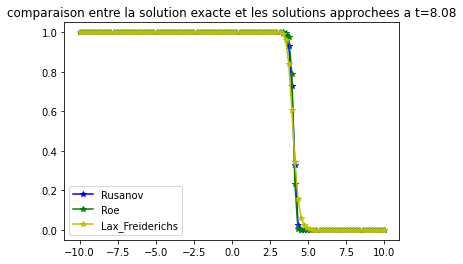

L'erreur pour le schema de Roe: 0.3141367111967098
L'erreur pour le schema Rsnv: 0.435208210994654
L'erreur pour le schema Lax-Freiderichs: 0.5758886903758632
L'erreur pour le schema volume fini decentré: 0.3141367111967097


In [6]:
N=100
l=-10
L=10
h=(L-l)/(N-1)
T=8
ul=1
ur=0
dx = (L-l)/(N-1)
X = np.linspace(l,L,N)
# CFL:
CFL=0.5

alpha = 5

def u0(x):
    if x<=0:
        return ul
    else:
        return ur
def Uex(t,x):
    if x<0.5*(ul+ur)*t:
        return ul
    
    else:
        return ur




"*************le flux exacte**************"
def F(u):
    return (u**2)/2


    
"*************le flux de Rusanov**************"
def Rusanov(ug,ud):
    lamda= max(abs(ug),abs(ud))
    return 0.5*(F(ug)+F(ud)-lamda*(ud-ug))


"*************le flux de Roe**************"
def Roe(ug,ud):
    return 0.5 *( (F(ug)+F(ud)) - (ug+ud)/2 *(ud-ug) )
            
"*************le flux de Lax-Friedrichs**************"
def LF(ug,ud):
    return 0.5 *( (F(ug)+F(ud)) - 0.5*(dx/dt) *(ud-ug) )
            
                  
               
               
U0=np.array([u0(x) for x in X])




Un_Roe = U0.copy()
Unp1_Roe = np.zeros(N)

Un_Rsnv = U0.copy()
Unp1_Rsnv = np.zeros(N)

Un_FVD = U0.copy()
Unp1_FVD = np.zeros(N)

Un_FVC = U0.copy()
Unp1_FVC = np.zeros(N)

Un_LF = U0.copy()
Unp1_LF = np.zeros(N)


j=0
temps = 0
while temps <= T:
    k1 = CFL/max(abs(Un_Rsnv))
    k2 = CFL/max(abs(Un_Roe))
    k3 = CFL/max(abs(Un_LF))
    k4 = CFL/max(abs(Un_FVD))
    k=min(k1,k2,k3,k4)
    dt=k*dx
    ############################################################################################
    ###################################### Schema de Rusanov ###################################
    ############################################################################################
    for i in range(1,N-1):
        
        Fd = Rusanov(Un_Rsnv[i],Un_Rsnv[i+1])
        Fg = Rusanov(Un_Rsnv[i-1],Un_Rsnv[i])
        Unp1_Rsnv[i]=Un_Rsnv[i]-dt/dx*(Fd-Fg)
        
    Unp1_Rsnv[0] = Unp1_Rsnv[1]
    Unp1_Rsnv[N-1] = Unp1_Rsnv[N-2]
    
    
    Un_Rsnv = Unp1_Rsnv.copy()
    ############################################################################################
    ###################################### Schema de Roe #######################################
    ############################################################################################
    for i in range(1,N-1):
        
        Fd = Roe(Un_Roe[i],Un_Roe[i+1])
        Fg = Roe(Un_Roe[i-1],Un_Roe[i])
        Unp1_Roe[i]=Un_Roe[i]-dt/dx*(Fd-Fg)
        
    Unp1_Roe[0] = Unp1_Roe[1]
    Unp1_Roe[N-1] = Unp1_Roe[N-2]
    
    
    Un_Roe = Unp1_Roe.copy()
    ############################################################################################
    ################################# Schema centré VF #########################################
    ############################################################################################
    for i in range(2, N-1):
        Fd = 0.5 *( F(Un_FVC[i]) + F(Un_FVC[i+1]))
        Fg = 0.5 *( F(Un_FVC[i-1]) + F(Un_FVC[i]))
        Unp1_FVC[i] = Un_FVC[i] - dt / dx * (Fd - Fg)
    
    Unp1_FVC[0] = Unp1_FVC[1] = Unp1_FVD[2]
    Unp1_FVC[N-1] = Unp1_FVC[N-2]
    
    Un_FVC = Unp1_FVC.copy()
    ############################################################################################
    ############################### Schema De Lax_Friedrichs ####################################
    ############################################################################################
    for i in range(1,N-1):
        Fd=LF(Un_LF[i],Un_LF[i+1])
        Fg=LF(Un_LF[i-1],Un_LF[i])  
        Unp1_LF[i]=Un_LF[i]-dt/dx*(Fd-Fg)
        
    Unp1_LF[0] = Unp1_LF[1]
    Unp1_LF[N-1] = Unp1_LF[N-2]
    
    
    Un_LF = Unp1_LF.copy()
    ############################################################################################
    ################################# Schema decentré VF #######################################
    ############################################################################################
    for i in range(2, N-1):
        Fd = F(Un_FVD[i]) 
        Fg = F(Un_FVD[i-1]) 
        Unp1_FVD[i] = Un_FVD[i] - dt / dx * (Fd - Fg)
    
    Unp1_FVD[0] = Unp1_FVD[1] = Unp1_FVD[2]
    Unp1_FVD[N-1] = Unp1_FVD[N-2]
    
    Un_FVD = Unp1_FVD.copy()
    ############################################################################################
    #################################### Solution Exacte #######################################
    ############################################################################################
    Uexact = np.zeros(N)
    for i in range(N):
        Uexact[i] = Uex(temps, X[i])
       
    
    
        
        
    temps = temps + dt

#plt.plot(X, Uexact, '-r', label='Sol exacte ')
plt.plot(X, Un_Rsnv, '*-b', label='Rusanov')
plt.plot(X, Un_Roe, '*-g', label='Roe')
plt.plot(X, Un_LF, '*-y', label='Lax_Freiderichs')
#plt.plot(X, Un_FVD, linestyle='-', marker='p', color='purple', label='VF_decentré')
plt.title(f'comparaison entre la solution exacte et les solutions approchees a t={temps:.2f}')
plt.legend()
plt.pause(0.1)


e_Roe =  np.linalg.norm(Uexact - Un_Roe,ord = 2) 
e_Rsnv =  np.linalg.norm(Uexact - Un_Rsnv,ord = 2) 
e_LF =  np.linalg.norm(Uexact - Un_LF,ord = 2) 
e_FVD =  np.linalg.norm(Uexact - Un_FVD,ord = 2) 
   
print(f"L'erreur pour le schema de Roe: {e_Roe}")
print(f"L'erreur pour le schema Rsnv: {e_Rsnv}")
print(f"L'erreur pour le schema Lax-Freiderichs: {e_LF}")
print(f"L'erreur pour le schema volume fini decentré: {e_FVD}")



# Équation de diffusion en 1-D

L'équation de diffusion unidimensionnelle est :
$$\frac{\partial u}{\partial t} = b \frac{\partial^2 u}{\partial x^2}$$

Maintenant, nous pouvons écrire la version discrétisée de l'équation de diffusion en 1D :
$$\frac{u^{n+1}_{i} - u^{n}_{i}}{\Delta t}=   b \frac{ \left( u^{n}_{i+1} - 2u^{n}_{i} + u^{n}_{i-1} \right)}{\Delta x^2}$$

Comme précédemment, nous remarquons qu'une fois que nous avons une condition initiale, la seule inconnue est $u^{n+1}_{i}$, nous réorganisons donc l'équation pour résoudre notre inconnue :
$$u^{n+1}_{i} = u^{n}_{i} + \frac{b \Delta t}{\Delta x^2} \left( u^{n}_{i+1} - 2u^{n}_{i} + u^{n}_{i-1} \right)$$





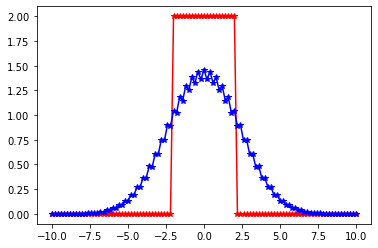

In [20]:
# La vitesse:
b = 1
# Les extremites:
l = -10
L = 10
# Le temps final:
T=2
# La descitisation du domaine:
N = 101
dx = (L-l)/(N-1)
X = np.linspace(l,L,N)
# CFL:
CFL=1/2
dt=CFL*dx**2/abs(b)


# La solution initiale:
alpha = 5

def u0(x):
    if  x>= -2 and x <= 2:
        return 2
    else: return 0

U0=np.array([u0(x) for x in X])
plt.plot(X, U0, '*-r', label='Rusanov')




Un = U0.copy()
Unp1 = np.zeros(N)
temps=0
while temps<T:
    for i in range (1,N-1):
        Unp1[i] = Un[i] + b * dt / dx**2 * (Un[i+1] - 2 * Un[i] + Un[i-1])
    Unp1[0]=Unp1[1]
    Unp1[N-1]=Unp1[N-2]
    Un = Unp1.copy()
    temps+=dt
    
plt.plot(X, Un, '*-b', label='Rusanov')


# Équation de covection et diffusion en 1-D

L'équation de diffusion unidimensionnelle est :
$$\frac{\partial u}{\partial t}+a\frac{\partial u}{\partial x} = b \frac{\partial^2 u}{\partial x^2}$$

Maintenant, nous pouvons écrire la version discrétisée de l'équation de diffusion en 1D :
$$\frac{u^{n+1}_{i} - u^{n}_{i}}{\Delta t}+a\frac{u^{n}_{i-1} - u^{n}_{i}}{\Delta x}=   b \frac{ \left( u^{n}_{i+1} - 2u^{n}_{i} + u^{n}_{i-1} \right)}{\Delta x^2}$$

Comme précédemment, nous remarquons qu'une fois que nous avons une condition initiale, la seule inconnue est $u^{n+1}_{i}$, nous réorganisons donc l'équation pour résoudre notre inconnue :
$$u^{n+1}_{i} = u^{n}_{i} - \frac{a \Delta t}{\Delta x} \left( u^{n}_{i} - u^{n}_{i-1} \right) + \frac{b \Delta t}{\Delta x^2} \left( u^{n}_{i+1} - 2u^{n}_{i} + u^{n}_{i-1} \right)$$




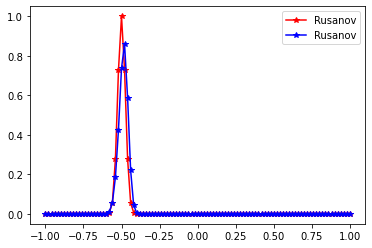

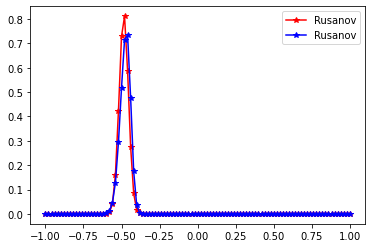

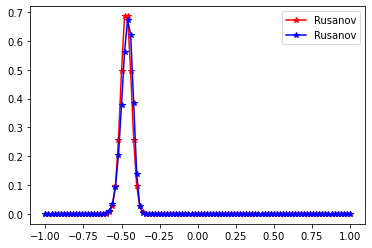

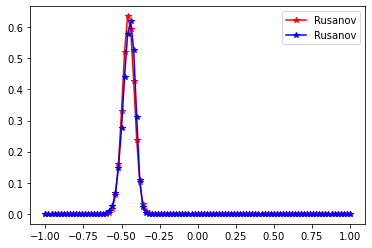

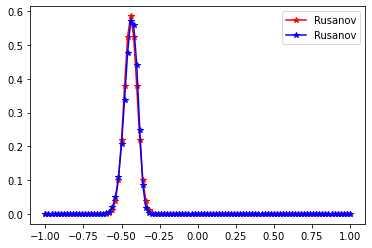

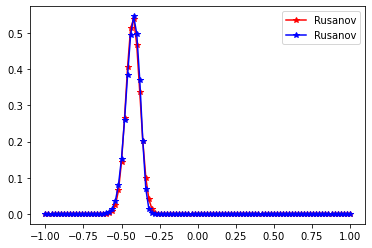

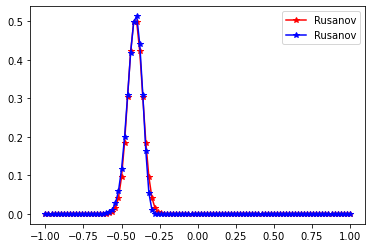

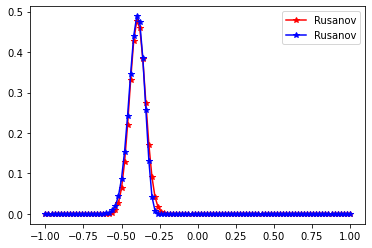

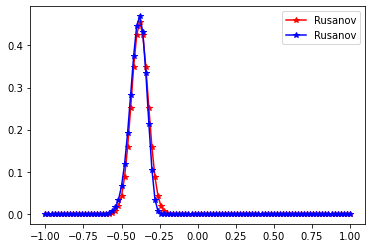

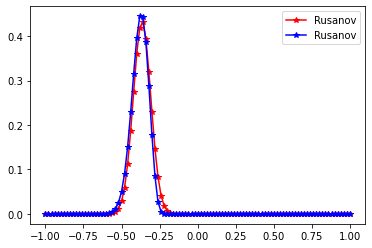

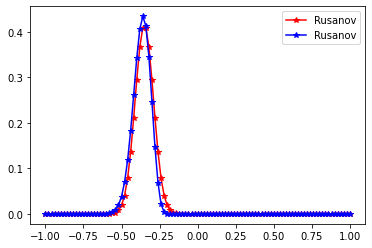

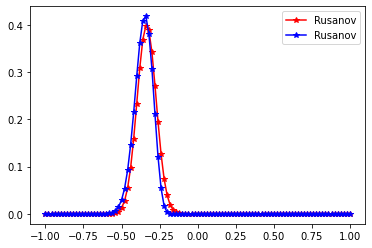

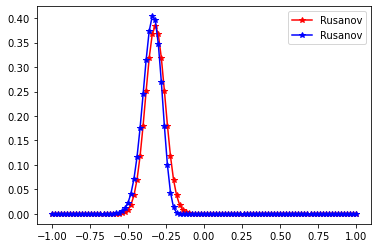

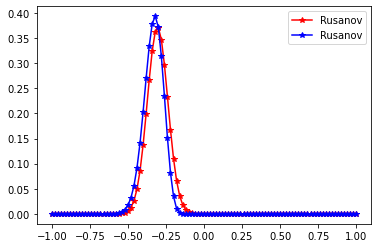

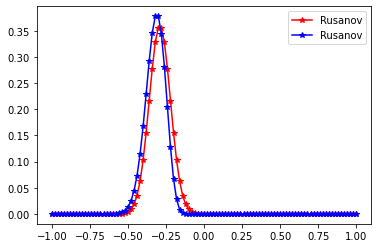

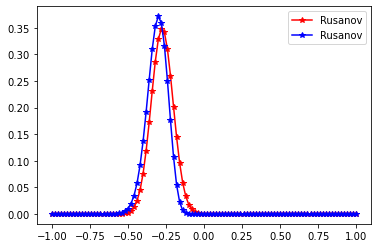

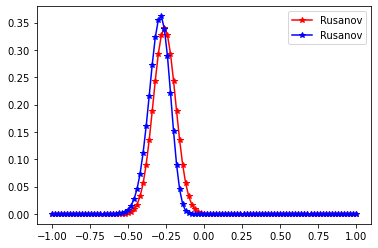

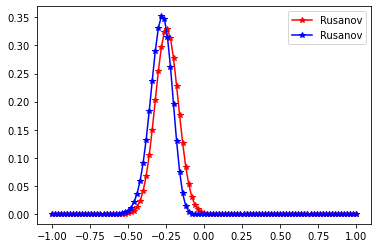

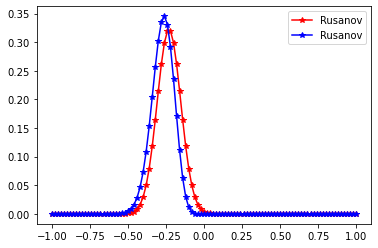

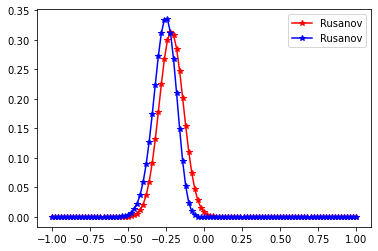

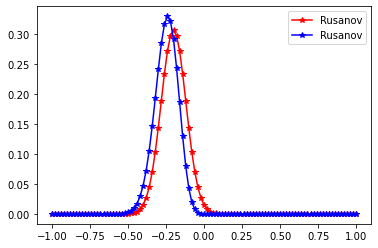

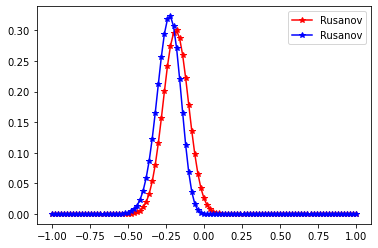

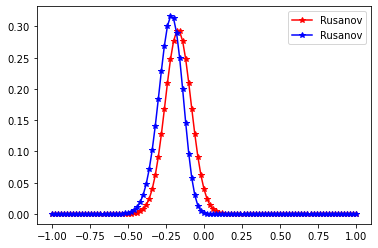

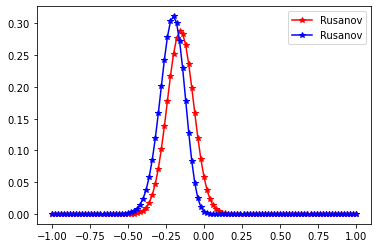

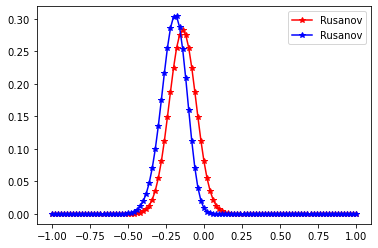

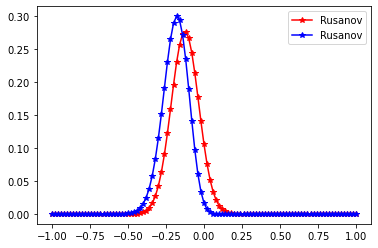

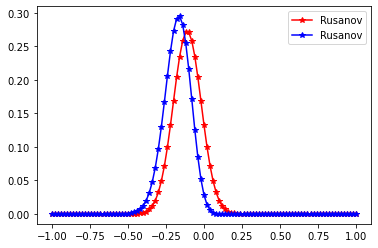

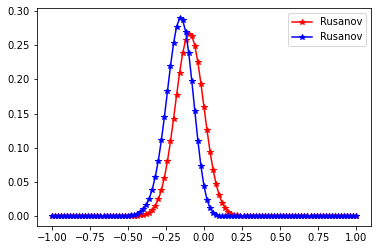

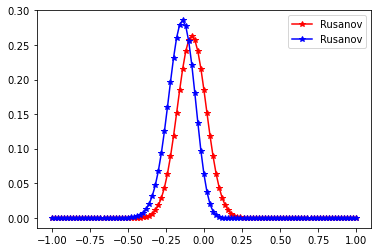

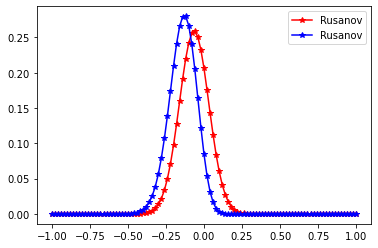

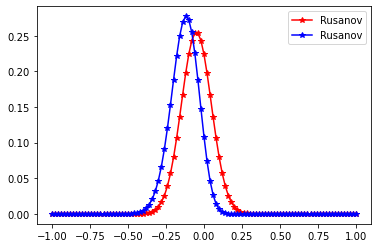

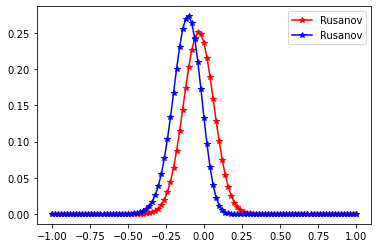

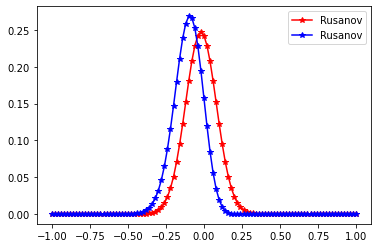

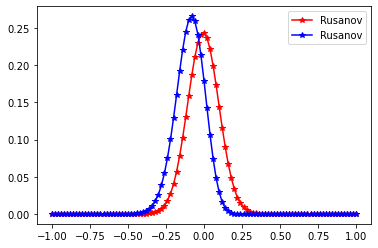

In [4]:
# La vitesse:
a=0.8
b = 0.008
# Les extremites:
l = -1
L = 1
# Le temps final:
T=0.5
# La descitisation du domaine:
N = 101
dx = (L-l)/(N-1)
X = np.linspace(l,L,N)
# CFL:
CFL1=0.6
CFL2=0.6
dt1=CFL1*dx/abs(a)
dt2=CFL2*dx**2/abs(b)
dt=min(dt1,dt2)

# La solution initiale:

def u0(x):
    return np.exp(-((x+0.5)**2)/(0.00125))

# La solution exacte:
def SolEx(x,t):
    return 0.025/(np.sqrt(0.000625 + 0.02*t)) * np.exp(-((x+0.5-t)**2)/(0.00125+0.04*t))

U0=np.array([u0(x) for x in X])



Un = U0.copy()
Unp1 = np.zeros(N)
temps=0
while temps<T:
    for i in range (1,N-1):
        Unp1[i] = Un[i] -a * dt / (2*dx) *(Un[i+1] -  Un[i-1])+ a**2 * (dt**2)/(2*dx**2) * (Un[i+1] - 2 * Un[i] + Un[i-1]) + b * dt / dx**2 * (Un[i+1] - 2 * Un[i] + Un[i-1])
    Unp1[0]=Unp1[1]
    Unp1[N-1]=Unp1[N-2]
    Un = Unp1.copy()
    
    Uexact = np.zeros(N)
    for i in range(N):
        Uexact[i] = SolEx(X[i],temps)
    temps+=dt

    plt.plot(X, Uexact, '*-r', label='Rusanov')
    plt.plot(X, Un, '*-b', label='Rusanov')
    plt.legend()
    plt.pause(0.1)